# PMR3508 - Classificador KNN - Base Adult

# Importando os Dados (e as Bibliotecas)

In [1]:
# Bibliotecas usadas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Criar o data.frame com os dados de treino

data_frame = pd.read_csv("C:/Users/samue/Desktop/1. Prog/3. Python (Machine Learning)/Resolução/train_data.csv",
                         index_col=['Id'],
                         na_values="?")

In [3]:
# Observar as primeiras observações

data_frame.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
Id,,,,,,,,,,,,,,,
16280,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,United-States,<=50K
16281,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
16282,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,<=50K
16283,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
16284,57,Self-emp-inc,258883,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,Hungary,>50K


In [4]:
# Visualizar o tipo do data.frame e suas informações

print(type(data_frame),'\n')
data_frame.info()

<class 'pandas.core.frame.DataFrame'> 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32560 entries, 16280 to 48839
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       30724 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education.num   32560 non-null  int64 
 5   marital.status  32560 non-null  object
 6   occupation      30717 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital.gain    32560 non-null  int64 
 11  capital.loss    32560 non-null  int64 
 12  hours.per.week  32560 non-null  int64 
 13  native.country  31977 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


# Visualizando e Entendo os Dados

In [5]:
# Entendo algumas medidas descritivas

data_frame.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Gráficos, Frequências e Correlações

### Variáveis Categóricas

<AxesSubplot:>

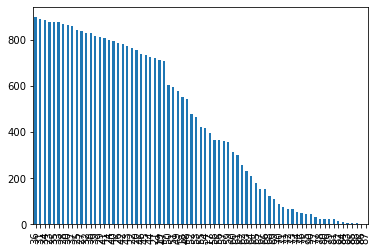

In [6]:
# Contagem das Idades

data_frame["age"].value_counts().plot(kind="bar")

<AxesSubplot:>

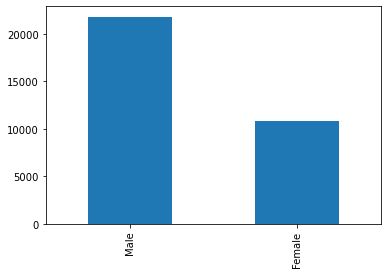

In [7]:
#Contagem de ambos os sexos

data_frame["sex"].value_counts().plot(kind="bar")

<AxesSubplot:>

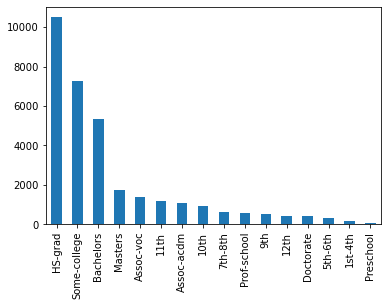

In [8]:
# Contando as formações

data_frame["education"].value_counts().plot(kind="bar")

<AxesSubplot:>

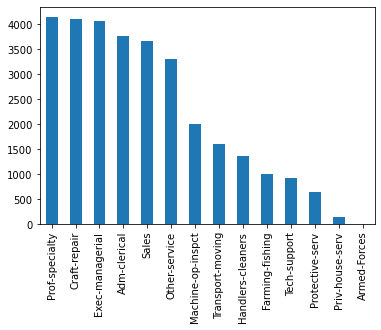

In [9]:
# Contando as ocupações

data_frame["occupation"].value_counts().plot(kind="bar")

<AxesSubplot:>

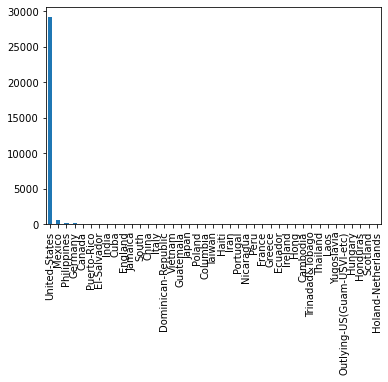

In [10]:
# Contando as nacionalidades

data_frame["native.country"].value_counts().plot(kind="bar")

In [11]:
# Obter o percentual de ocorrências de cada possível valor do atributo

data_frame["native.country"].value_counts(normalize = True, dropna = True)

United-States                 0.912187
Mexico                        0.020108
Philippines                   0.006192
Germany                       0.004284
Canada                        0.003784
Puerto-Rico                   0.003565
El-Salvador                   0.003315
India                         0.003127
Cuba                          0.002971
England                       0.002815
Jamaica                       0.002533
South                         0.002502
China                         0.002345
Italy                         0.002283
Dominican-Republic            0.002189
Vietnam                       0.002095
Guatemala                     0.002001
Japan                         0.001939
Poland                        0.001876
Columbia                      0.001845
Taiwan                        0.001595
Haiti                         0.001376
Iran                          0.001345
Portugal                      0.001157
Nicaragua                     0.001063
Peru                     

Os dados da coluna 'native.country' estão bastante desbalanceados, com 'Estados Unidos' estando presente em mais de 90% das observações. Logo, a opção adotada será de removê-la.

### Variávies Numéricas

#### Criando um data.frame para modificar Y

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
data_frame_analise = data_frame.copy()

In [14]:
# Modificando o data.frame, transformando a variável Y em 0s e 1s
# Para facilitar o uso na correlação

data_frame_analise['income'] = LabelEncoder().fit_transform(data_frame_analise['income'])

In [15]:
print(data_frame_analise['income'])

Id
16280    0
16281    0
16282    0
16283    0
16284    1
        ..
48835    1
48836    0
48837    0
48838    0
48839    0
Name: income, Length: 32560, dtype: int32


C:\Users\samue\AppData\Local\Temp\ipykernel_12060\2587928561.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(data_frame_analise.corr(), dtype=np.bool))


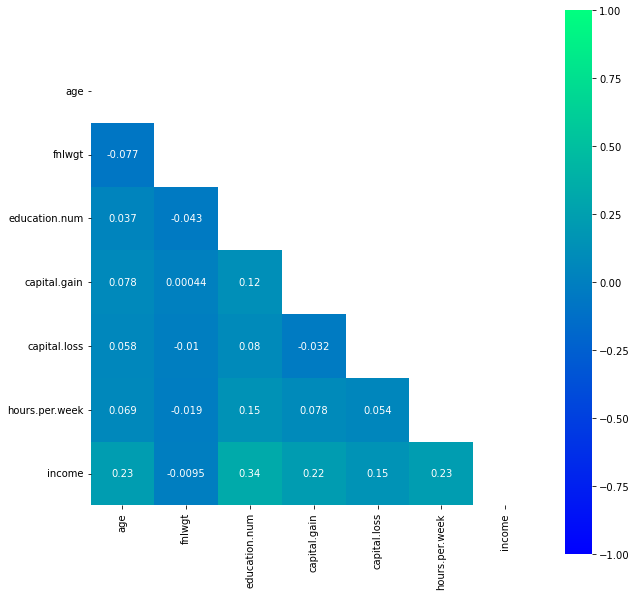

In [16]:
# Criar a matriz de correlação das variáveis como um heatmap

mask = np.triu(np.ones_like(data_frame_analise.corr(), dtype=np.bool))

plt.figure(figsize=(10,10))

sns.heatmap(data_frame_analise.corr(), mask=mask, square = True, annot=True, vmin=-1, vmax=1, cmap='winter')
plt.show()

Todas as variáveis possuem certo grau de correlação com a variável classe 'income', exceto por "fnlwgt". Logo, esta variável será removida do modelo.

# Limpeza dos Dados

In [17]:
# Além das variáveis já citadas, a variável 'education também será removida',
# uma vez que a variável 'education.num' já cumpre esse papel

data_frame.drop_duplicates(keep='first', inplace=True)
data_frame = data_frame.drop(['fnlwgt', 'native.country', 'education'], axis=1)

In [18]:
data_frame.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
Id,,,,,,,,,,,,
16280,34,Private,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,<=50K
16281,58,Local-gov,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,<=50K
16282,25,Private,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,<=50K
16283,24,Private,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,<=50K
16284,57,Self-emp-inc,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,>50K


In [19]:
# Definindo os dados de treino

Y_treino = data_frame.pop('income')
X_treino = data_frame

In [20]:
print(Y_treino)

Id
16280    <=50K
16281    <=50K
16282    <=50K
16283    <=50K
16284     >50K
         ...  
48835     >50K
48836    <=50K
48837    <=50K
48838    <=50K
48839    <=50K
Name: income, Length: 32536, dtype: object


In [21]:
X_treino.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week
Id,,,,,,,,,,,
16280,34,Private,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44
16281,58,Local-gov,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40
16282,25,Private,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42
16283,24,Private,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40
16284,57,Self-emp-inc,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60


## Pipelines e Pré-Processamento

### Há colunas com dados categóricos, númericos e numéricos esparsos

In [22]:
# Definir quais colunas/features são de cada tipo

colunas_numericas   = list(X_treino.select_dtypes(include=[np.number]).columns.values)
colunas_numericas.remove('capital.gain')
colunas_numericas.remove('capital.loss')


colunas_esparsas    = ['capital.gain', 'capital.loss']
colunas_categoricas = list(X_treino.select_dtypes(exclude=[np.number]).columns.values)

In [23]:
print(f"\nColunas numéricas:  {colunas_numericas}")
print(f"\nColunas esparsas:   {colunas_esparsas}")
print(f"\nColunas categóricas:{colunas_categoricas}")


Colunas numéricas:  ['age', 'education.num', 'hours.per.week']

Colunas esparsas:   ['capital.gain', 'capital.loss']

Colunas categóricas:['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex']


### Importando as classes e criando as pipelines

In [24]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer

In [25]:
# Criar a pipeline para os dados categóricos
# Imputando a moda nos valores faltantes

pipeline_categorica = Pipeline(steps = [
    
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehot', OneHotEncoder(drop='if_binary'))
    
])

In [26]:
# Criar a pipeline para os dados esparsos
# Imputando os valores faltantes com os 12 vizinhos mais próximos

pipeline_esparsa = Pipeline(steps = [
    
    ('imputer', KNNImputer(n_neighbors=12, weights="uniform")),
    ('scaler', RobustScaler())
    
])

In [27]:
# Criar a pipeline para dados numéricos
# Com os dados passando pela padronização Z-Score

pipeline_numerica = Pipeline(steps = [
    
    ('imputer', KNNImputer(n_neighbors=12, weights="uniform")),
    ('scaler', StandardScaler())
    
])

#### Criando o Pré-Processador que irá transformar os dados com base nos pipelines

In [28]:
processador = ColumnTransformer(transformers = [
    
    ('num', pipeline_numerica,   colunas_numericas),
    ('spr', pipeline_esparsa,    colunas_esparsas),
    ('cat', pipeline_categorica, colunas_categoricas)
    
])

In [29]:
X_treino = processador.fit_transform(X_treino)

# Classificador KNN

In [30]:
# Importando classes

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [31]:
# Instancia o classificador com k=20

KNN = KNeighborsClassifier(n_neighbors=20)

In [32]:
# Calcula a acurácia com cross-validation com 5 folds e k=20

score = cross_val_score(KNN, X_treino, Y_treino, cv = 5, scoring="accuracy")

print(f"Acurácia com validação cruzada:{score.mean():10.4f}")

Acurácia com validação cruzada:    0.8682


## Testando vários Ks diferentes

In [33]:
K = [10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]

#### Observação: O tempo de processamento é grande com tantos ks

In [34]:
# Definir dicionário que guardará os valores de acurácia

acuracia_k = {}

In [35]:
# Loop que faz a cross-validation de cada k e armazena sua acurácia

#for n_vizinhos in K:
 #   
  #  score = cross_val_score(KNeighborsClassifier(n_neighbors=n_vizinhos), X_treino, Y_treino, cv = 5, scoring="accuracy").mean()
   # 
    #acuracia_k[n_vizinhos] = score

In [36]:
print(acuracia_k)

{}


In [37]:
##### Observação: Este dicionário foi obtido em uma das iterações. Deve ser usado quando não se quer esperar o tempo total de processamento do loop acima

acuracia_k = {
 '10': 0.8624385749385748,
 '11': 0.862039312039312,
 '12': 0.8633292383292381,
 '13': 0.8630528255528256,
 '14': 0.8627457002457003,
 '15': 0.8629299754299755,
 '16': 0.8621621621621621,
 '17': 0.8630221130221131,
 '18': 0.8633906633906634,
 '19': 0.8628071253071253,
 '20': 0.8647113022113022,
 '21': 0.8641277641277642,
 '22': 0.864527027027027,
 '23': 0.8637592137592136,
 '24': 0.8643120393120393,
 '25': 0.8645577395577396,
 '26': 0.8641277641277642,
 '27': 0.864066339066339,
 '28': 0.8640970515970515,
 '29': 0.8639742014742016,
 '30': 0.8639127764127764}

In [38]:
# Extrair apenas os valores do dicionário para plotar

valores_acuracias = list((acuracia_k.values()))
len(valores_acuracias)

21

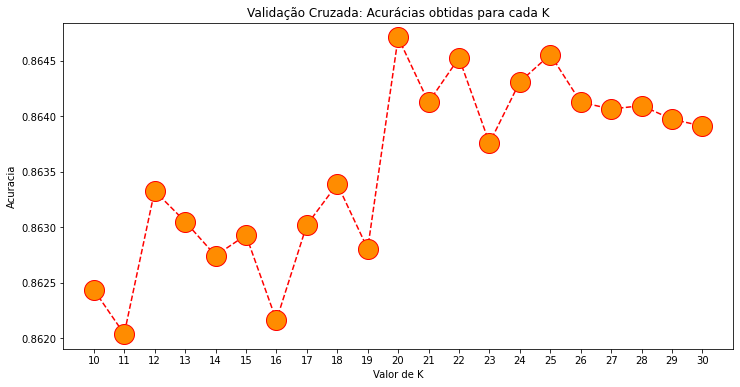

In [39]:
# Plotagem das acurácias de ks, usando matplotlib

plt.figure(figsize=(12, 6))  
plt.plot(K, valores_acuracias, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='darkorange', markersize=20)

plt.title('Validação Cruzada: Acurácias obtidas para cada K')  
plt.xlabel('Valor de K')  
plt.ylabel('Acuracia')
plt.xticks(K)
plt.show()

In [40]:
# Encontrar o melhor K de todos

melhor_k = max(acuracia_k, key = acuracia_k.get)
maior_acuracia = acuracia_k[melhor_k]

print(f"O K com maior acurácia é igual a: {melhor_k} com acurácia de {(maior_acuracia*100):6.6} %")

O K com maior acurácia é igual a: 20 com acurácia de 86.4711 %


In [41]:
KNN = KNeighborsClassifier(n_neighbors=melhor_k)

In [42]:
# Treinar o classificador KNN

KNN.fit(X_treino, Y_treino)

KNeighborsClassifier(n_neighbors='20')

# Testando o Classificador

In [43]:
# Importar os dados de treino

dados_teste = pd.read_csv("C:/Users/samue/Desktop/1. Prog/3. Python (Machine Learning)/Resolução/test_data.csv", index_col=['Id'], na_values="?")

In [44]:
# Eliminar as mesmas colunas que anteriormente

X_teste = dados_teste.drop(['fnlwgt', 'native.country', 'education'], axis=1)

In [45]:
X_teste.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week
Id,,,,,,,,,,,
0,25,Private,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,44
1,64,State-gov,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45
2,31,Private,14,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,40
3,45,Private,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40
4,64,Self-emp-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50


In [46]:
# Processando os dados de teste com o pipeline definido anteriormente

X_teste = processador.transform(X_teste)

In [47]:
melhor_k = int(melhor_k)
print(melhor_k)

20


In [48]:
## A predição executada pelo classificador KNN

KNN = KNeighborsClassifier(n_neighbors = melhor_k)
KNN.fit(X_treino, Y_treino)

predicoes = KNN.predict(X_teste)
print(predicoes)

['<=50K' '>50K' '<=50K' ... '<=50K' '<=50K' '>50K']


## Submissão para o Kaggle

In [53]:
# Criar um data.frame com as colunas Id e income

submissao = pd.DataFrame()

In [54]:
# Definir os dados do data.frame

submissao[0] = dados_teste.index
submissao[1] = predicoes
submissao.columns = ['Id','income']

In [55]:
submissao.head()

,Id,income
0,0,<=50K
1,1,>50K
2,2,<=50K
3,3,<=50K
4,4,>50K


In [56]:
# Exportar como arquivo.csv

submissao.to_csv('submissao.csv',index = False)